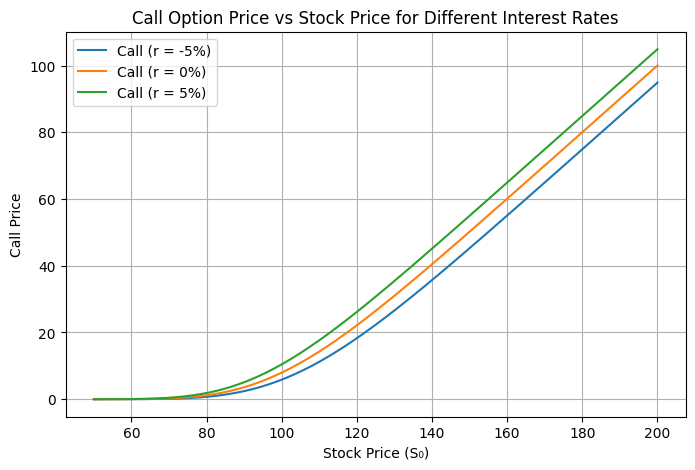

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- Black–Scholes formulas ---
def bs_call_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    put  = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return call, put

# --- Parameters ---
K = 100
T = 1.0
sigma = 0.2
r_values = [-0.05, 0.0, 0.05]  # -5%, 0%, +5%
S_values = np.linspace(50, 200, 200)

# --- Plot Call Prices ---
plt.figure(figsize=(8,5))
for r in r_values:
    calls = [bs_call_put(S, K, T, r, sigma)[0] for S in S_values]
    plt.plot(S_values, calls, label=f'Call (r = {r*100:.0f}%)')
plt.title('Call Option Price vs Stock Price for Different Interest Rates')
plt.xlabel('Stock Price (S₀)')
plt.ylabel('Call Price')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
'''
As r increases, the K we have to pay in the future is worth less, think of E[exp(-rt)(S_T - K)] in the risk neutral world
so call option strictly increases as r increases. Note we asymptope to S - Kexp(-rt)
'''

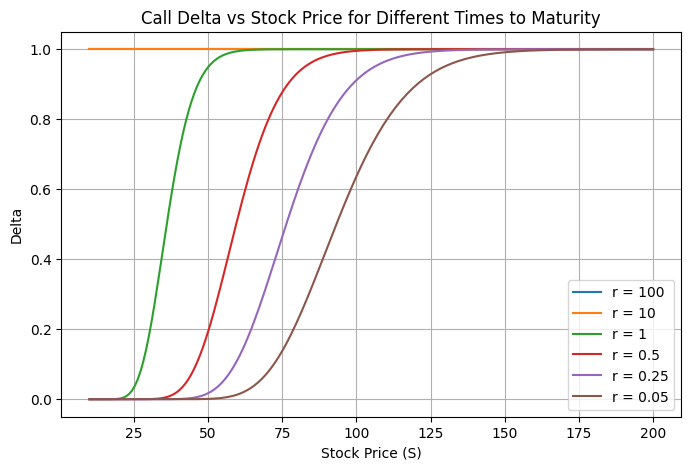

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes call delta
def call_delta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

# Parameters
K = 100
sigma = 0.2
T = 1
# Range of underlying prices
S_values = np.linspace(10, 200, 200)

# Different times to maturity
r_list = [100,10,1, 0.5, 0.25, 0.05]

plt.figure(figsize=(8,5))
for r in r_list:
    delta_vals = [call_delta(S, K, T, r, sigma) for S in S_values]
    plt.plot(S_values, delta_vals, label=f'r = {r}')

plt.title('Call Delta vs Stock Price for Different Times to Maturity')
plt.xlabel('Stock Price (S)')
plt.ylabel('Delta')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
'''
Note Delta = N(d_1) means that we always have larger r means thinner tailed delta, i.e. green line (r = 1) always stays above red (r = 0.5). This does mean a lighter tail for gamma
'''

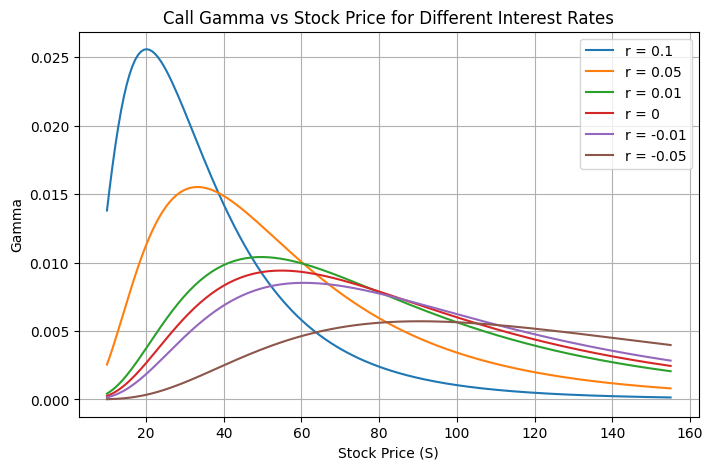

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes gamma function
def call_gamma(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

# Parameters
K = 100
T = 10     # fixed time to maturity
sigma = 0.2  # volatility

# Range of underlying prices
S_values = np.linspace(10, 155, 200)

# Different interest rates to compare
r_list = [0.1,0.05,0.01,0,-0.01,-0.05]

plt.figure(figsize=(8,5))
for r in r_list:
    gamma_vals = [call_gamma(S, K, T, r, sigma) for S in S_values]
    plt.plot(S_values, gamma_vals, label=f'r = {r}')

plt.title('Call Gamma vs Stock Price for Different Interest Rates')
plt.xlabel('Stock Price (S)')
plt.ylabel('Gamma')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
'''
n(d_1)/(S sigma root(t))
The bigger the r, the larger the peak since smaller the S needed for d_1 = 0. Also, the bigger smaller the asymptope because larger S_1 gives larger d_1 so smaller n(d_1)
'''